#Set up environment

1. Install Packages and Dependencies
*   **gymnaisum**: toolkit for developing and comparing reinforcement learning algorithms. It provides various environments that simulate real-world scenarios, which are essential for testing and training RL models.
*   **pygame**: writing video games; in reinforcement learning it is used to create custom environments
*   **numpy**: library for numerical computation in python and provides support for arrays, matrices, and many mathematical functions essential for implementing and testing algorithms
*   **imageio and imageio_ffmpeg**: libararies used to read and write images and videos -- useful to render environment and create visualization of our reinforcement learning model and training episodes on collabnotes as live redering is not possible
*   **pyglet**: A cross-platform windowing and multimedia library -- used for rendering graphics in reinforcement learning environments
*   **tqdm**: creates progress bars to help monitor progress of training and lenghty episodes

2. Import Libraries

3.  Virtual Display Setup

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible = 0, size=(3840,2610))
display.start()

4. Initialize Game Environment

Reinforcement Learning Environments (from OpenAI): https://gymnasium.farama.org/

Taxi Game:
*   Environment used: https://gymnasium.farama.org/environments/toy_text/taxi/

Understanding the environment:

*State Space*

500 discrete states: 25 taxi positions, 5 possible locations of the passenger, 4 destination locations

*Action Space*

6 actions:
*   0: Move south (down)
*   1: Move north (up)
*   2: Move east (right)
*   3: Move west (left)
*   4: Pickup passenger
*   5: Drop off passenger

# Q-learning Algorithms

5. Initialize Q-table

6. Training Policies

*   Greedy Policy
*   Epsilon-Greedy Policy



6. Training Paramemeters

7. Training Agent using Q-learning Algorithm

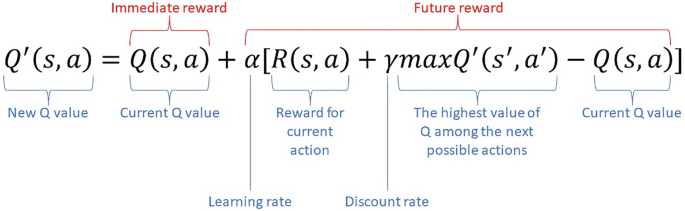

Training Function

Train Agent

# Save Reinforcement Learning Model

Model

# Visualize RL Model's Action

Record Video

In [ ]:
from math import trunc
def record_video(env, Qtable, out_directory, fps=1, max_steps=20):
  """
  Generate a replay video of agent
  :param env
  :param Qtable: Qtable of our agent
  :param out_directory
  :param fps: how many frames per second (w taxi-v3 we use 1)
  :param max_steps: max steps for recording
  """

  images = []
  terminated = False
  trucanted = False
  state, info = env.reset(seed=random.randint(0,500))
  img = env.render()
  images.append(img)
  step_count = 0

  while(not terminated or not trucanted) and step_count < max_steps:
    action = np.argmax(Qtable[state])
    state, reward,terminated,trucanted,info = env.step(action)
    img = env.render()
    images.append(img)
    step_count +=1

    imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)


Recording Single Video

In [ ]:
 video_name = "replay.mp4"
 record_video(env, model["qtable"], video_name,1)

Visualize Video frames into output

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('replay.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Evaluating RL Agent

In [ ]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param max_steps: Maximum number of steps per episode
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  :param seed: The evaluation seed array (for taxi-v3)
  """
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    if seed:
      state, info = env.reset(seed=seed[episode])
    else:
      state, info = env.reset()

    step = 0
    trucanted = False
    terminated = False
    total_rewards_ep = 0

    for step in range(max_steps):
      action = greedy_policy(Q,state)
      new_state, reward, terminated, trucanted, info = env.step(action)
      total_rewards_ep += reward

      if terminated or trucanted:
        break

      state = new_state
      episode_rewards.append(total_rewards_ep)

  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward


In [ ]:
#eval agent
mean_reward, std_reward = evaluate_agent(env, max_steps,n_eval_episodes,
                                         Qtable_taxi, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")